In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1. Descriptive statistics

# 3.2.	Confidence interval

In [2]:
sdf = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TII03/CSV/1.0/en')

In [3]:
sdf.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


In [4]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
sdf_col_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784','UNIT']
sdf.drop(sdf_col_drop ,axis=1, inplace=True) 

In [5]:
sdfa = sdf[(sdf['Luas Line'] != 'All Luas lines')]

In [6]:
# Renaming the columns
sdfa = sdfa.rename(columns={'Luas Line': 'Luas_Line'})

In [7]:
sdfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 1 to 752
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       502 non-null    object 
 1   Luas_Line  502 non-null    object 
 2   VALUE      496 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.7+ KB


In [8]:
# Display the rows with null values
sdfa_NaN = sdfa[sdfa.isnull().any(axis=1)]
print("Rows with null values:")
sdfa_NaN

Rows with null values:


,Week,Luas_Line,VALUE
157,2019 Week 53,Red line,NaN
158,2019 Week 53,Green line,NaN
475,2021 Week 53,Red line,NaN
476,2021 Week 53,Green line,NaN
634,2022 Week 53,Red line,NaN
635,2022 Week 53,Green line,NaN


We'll drop *'2020 Week 53'* to balance the years

In [9]:
#Dropping NaN
sdfa = sdfa.dropna(subset=['VALUE'])

In [10]:
#  Dropping '2020 Week 53' 
sdfa = sdfa[~sdfa['Week'].str.contains('Week 53')]


In [11]:
sdfa.head()

,Week,Luas_Line,VALUE
1,2019 Week 01,Red line,274139.0
2,2019 Week 01,Green line,275394.0
4,2019 Week 02,Red line,408199.0
5,2019 Week 02,Green line,430823.0
7,2019 Week 03,Red line,376785.0


In [12]:
# Extracting the year from Week column
sdfa['Year'] = pd.to_datetime(sdfa['Week'].str[:4] + ' ' + sdfa['Week'].str[-2:] + ' 1', format='%Y %W %w').dt.year

In [13]:
sdfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 1 to 752
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       494 non-null    object 
 1   Luas_Line  494 non-null    object 
 2   VALUE      494 non-null    float64
 3   Year       494 non-null    int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 17.4+ KB


In [14]:
sdfa.head()

,Week,Luas_Line,VALUE,Year
1,2019 Week 01,Red line,274139.0,2019
2,2019 Week 01,Green line,275394.0,2019
4,2019 Week 02,Red line,408199.0,2019
5,2019 Week 02,Green line,430823.0,2019
7,2019 Week 03,Red line,376785.0,2019


In [15]:
def count_occurrences_by_year(dataframe):
  
    year_counts = dataframe['Year'].value_counts().sort_index()

    return year_counts
result = count_occurrences_by_year(sdfa)
result

Year
2019    104
2020    104
2021    104
2022    104
2023     78
Name: count, dtype: int64

In [16]:
sdfa_2019 = sdfa[(sdfa['Year'] == 2019)].copy()
sdfa_2019.reset_index(drop=True, inplace=True)
sdfa_2020 = sdfa[(sdfa['Year'] == 2020)].copy()
sdfa_2020.reset_index(drop=True, inplace=True)
sdfa_2021 = sdfa[(sdfa['Year'] == 2021)].copy()
sdfa_2021.reset_index(drop=True, inplace=True)
sdfa_2022 = sdfa[(sdfa['Year'] == 2022)].copy()
sdfa_2022.reset_index(drop=True, inplace=True)

# We want to know the average of passengers for 2019. We will use 90% confidence

In [17]:
sdfa_2019.describe()

,VALUE,Year
count,104.000000,104.0
mean,462966.403846,2019.0
std,58751.214682,0.0
min,259211.000000,2019.0
25%,441097.250000,2019.0
50%,464353.000000,2019.0
75%,499103.250000,2019.0
max,622699.000000,2019.0


In [18]:
X = sdfa_2019.iloc[:,2:3].values

In [19]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([453404.34741473]), array([472528.46027757]))

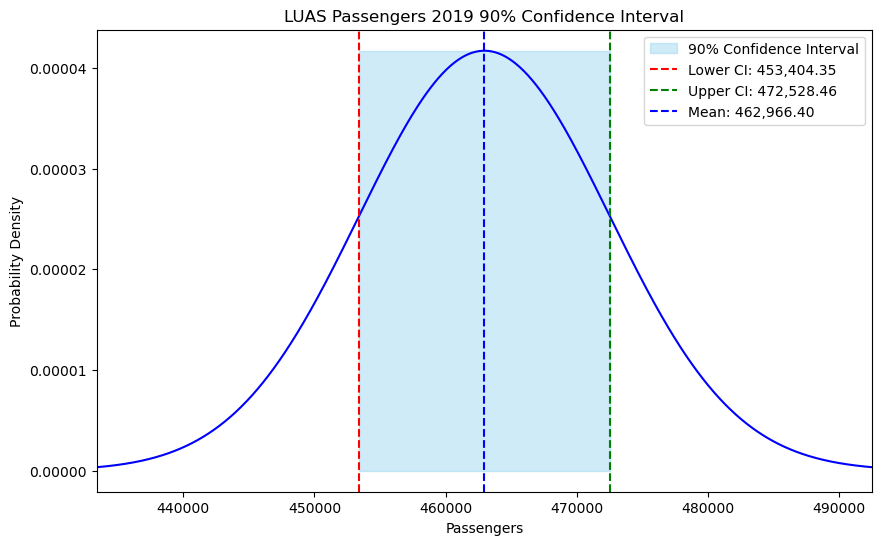

In [20]:


# Confidence interval values
confidence_interval = (453404.34741473, 472528.46027757)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 20000, confidence_interval[1] + 20000, 1000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2019 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 20000, confidence_interval[1] + 20000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We want to know the average of passengers for 2020. We will use 90% confidence

In [21]:
sdfa_2020.describe()

,VALUE,Year
count,104.000000,104.0
mean,185157.009615,2020.0
std,139494.873679,0.0
min,19727.000000,2020.0
25%,92848.000000,2020.0
50%,152092.000000,2020.0
75%,203166.000000,2020.0
max,482333.000000,2020.0


In [22]:
X = sdfa_2020.iloc[:,2:3].values

In [23]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([162453.51554746]), array([207860.50368331]))

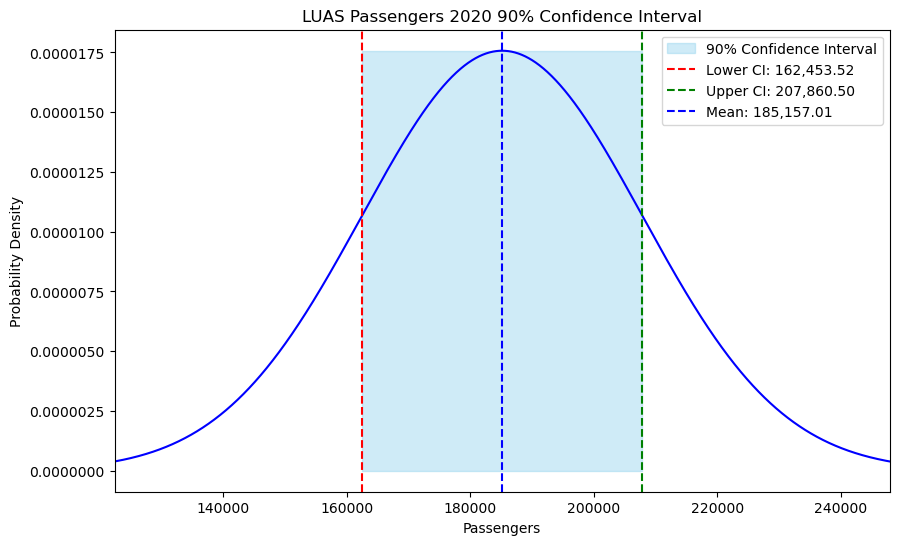

In [24]:
# Confidence interval values
confidence_interval = (162453.51554746, 207860.50368331)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 40000, confidence_interval[1] + 40000, 2000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2020 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 40000, confidence_interval[1] + 40000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We want to know the average of passengers for 2021. We will use 90% confidence

In [25]:
sdfa_2021.describe()

,VALUE,Year
count,104.000000,104.0
mean,187611.134615,2021.0
std,82667.596263,0.0
min,64278.000000,2021.0
25%,102652.500000,2021.0
50%,195341.500000,2021.0
75%,258089.000000,2021.0
max,327777.000000,2021.0


In [26]:
X = sdfa_2021.iloc[:,2:3].values

In [27]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([174156.56648787]), array([201065.7027429]))

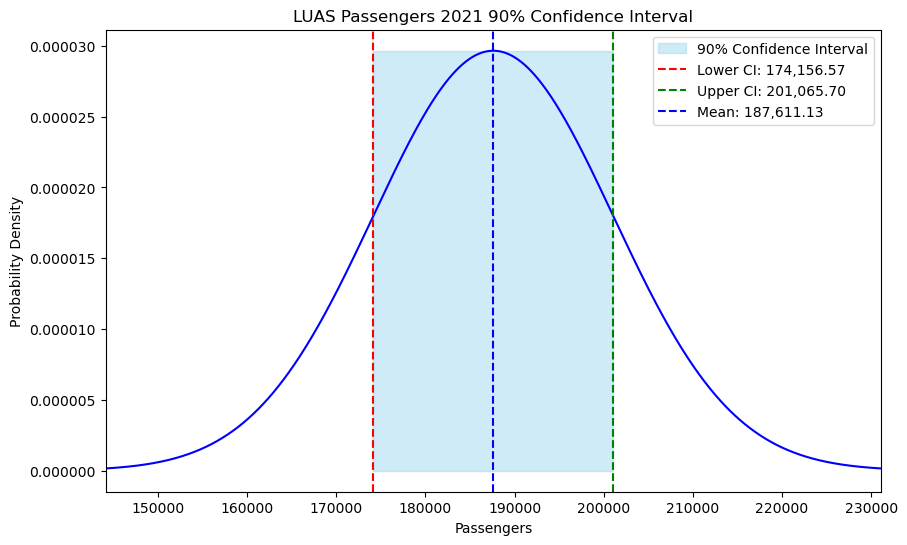

In [28]:
# Confidence interval values
confidence_interval = (174156.56648787, 201065.7027429)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 30000, confidence_interval[1] + 30000, 2000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2021 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 30000, confidence_interval[1] + 30000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We want to know the average of passengers for 2022. We will use 90% confidence

In [29]:
sdfa_2022.describe()

,VALUE,Year
count,104.000000,104.0
mean,373602.250000,2022.0
std,90580.590311,0.0
min,161546.000000,2022.0
25%,306127.500000,2022.0
50%,354642.000000,2022.0
75%,442544.750000,2022.0
max,547010.000000,2022.0


In [30]:
X = sdfa_2022.iloc[:,2:3].values

In [31]:
#We create our confidence interval using Student's T at 90% confidence
st.t.interval(confidence=0.90, df=len(X)-1, loc= np.mean(X), scale = st.sem(X))

(array([358859.80219134]), array([388344.69780866]))

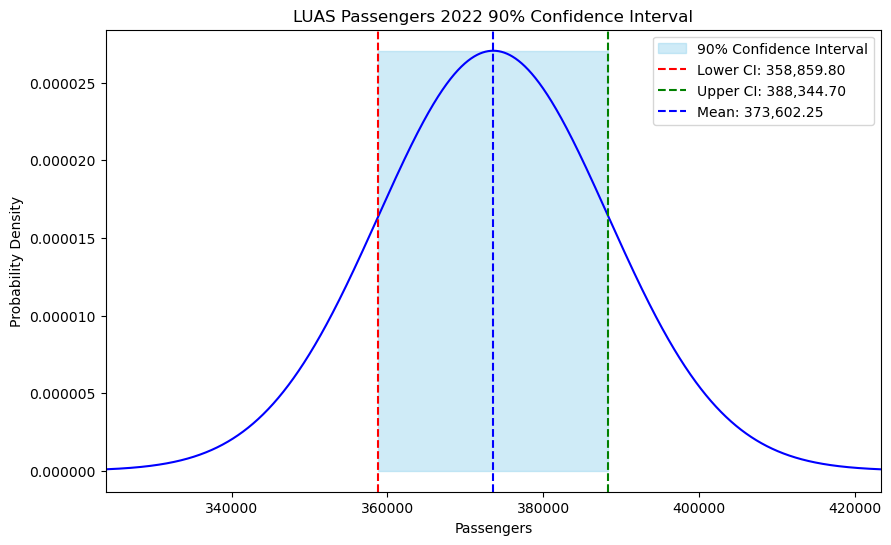

In [32]:
# Confidence interval values
confidence_interval = (358859.80219134, 388344.69780866)

# Creating range of values for the x-axis
x_values = np.linspace(confidence_interval[0] - 35000, confidence_interval[1] + 35000, 2000)

# Calculating probabilities for the visualisation assuming that it is normally distributed
pdf_values = st.norm.pdf(x_values, np.mean(confidence_interval), np.std(confidence_interval))


plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(x_values, pdf_values, color='blue', label='')

# shading the confidence interval
plt.fill_betweenx(y=[0, max(pdf_values)], x1=confidence_interval[0], x2=confidence_interval[1], color='skyblue', alpha=0.4, label='90% Confidence Interval')

# Add labels for confidence interval values, alpha, and mean
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'Lower CI: {confidence_interval[0]:,.2f}')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:,.2f}')
plt.axvline(x=np.mean(confidence_interval), color='blue', linestyle='--', label=f'Mean: {np.mean(confidence_interval):,.2f}')

# Adding labels and title
plt.xlabel('Passengers')
plt.ylabel('Probability Density')
plt.title('LUAS Passengers 2022 90% Confidence Interval')

# Set x-axis limits to further expand the bell
plt.xlim([confidence_interval[0] - 35000, confidence_interval[1] + 35000])
# Set the y-axis ticklabel_format to exclude exponent notation
plt.ticklabel_format(style='plain', axis='y')

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# We will perform a HT to compare the average passengers between Red and Green Luas lines for 2019

In [33]:
R = sdfa_2019.VALUE[sdfa_2019.Luas_Line == 'Red line']
G = sdfa_2019.VALUE[sdfa_2019.Luas_Line == 'Green line']

We work with data from the sample, so we can use a t test to verify whether the average charges is the same for both of them.<br>
We need x bar, we need S and the sample size to perform the hypothesis test.<br>
H0 : mu red luas = mu green luas<br>
H1: mu red luas != mu green luas

In [34]:
R.describe()

count        52.000000
mean     460492.461538
std       55856.204280
min      259211.000000
25%      442274.750000
50%      462205.500000
75%      498051.500000
max      556229.000000
Name: VALUE, dtype: float64

In [35]:
G.describe()

count        52.000000
mean     465440.346154
std       61957.199702
min      275394.000000
25%      440231.750000
50%      464353.000000
75%      500782.750000
max      622699.000000
Name: VALUE, dtype: float64

In [36]:
#We perform the t test for two populations
from scipy import stats

t_test = stats.ttest_ind_from_stats(mean1 = 460492.461538, std1 =55856.204280, nobs1 = 52, mean2 = 465440.346154, std2 =  61957.199702, nobs2 = 52, equal_var = False)

display(t_test)

Ttest_indResult(statistic=-0.4277204174837884, pvalue=0.6697659703442436)

As alpha was not given, we can assume 0.05 as alpha.<br>
As p value < alpha, then we accept H0 <br>
Interpretation: At a 5% significance level there is enough evidence to state that 2019 average passengers<br> for red and green luas lines are similar.

# We will perform a HT to compare the average passengers between Red and Green Luas lines for 2020

In [37]:
R = sdfa_2020.VALUE[sdfa_2020.Luas_Line == 'Red line']
G = sdfa_2020.VALUE[sdfa_2020.Luas_Line == 'Green line']

We work with data from the sample, so we can use a t test to verify whether the average charges is the same for both of them.<br>
We need x bar, we need S and the sample size to perform the hypothesis test.<br>
H0 : mu red luas = mu green luas<br>
H1: mu red luas != mu green luas

In [38]:
R.describe()

count        52.000000
mean     187865.211538
std      135942.731937
min       29666.000000
25%      100538.500000
50%      155910.000000
75%      200955.000000
max      472655.000000
Name: VALUE, dtype: float64

In [39]:
G.describe()

count        52.000000
mean     182448.807692
std      144235.232686
min       19727.000000
25%       82192.250000
50%      148967.500000
75%      206877.250000
max      482333.000000
Name: VALUE, dtype: float64

In [40]:
#We perform the t test for two populations
from scipy import stats

t_test = stats.ttest_ind_from_stats(mean1 = 187865.211538, std1 =135942.731937, nobs1 = 52, mean2 = 182448.807692, std2 =  144235.232686, nobs2 = 52, equal_var = False)

display(t_test)

Ttest_indResult(statistic=0.19706232126254775, pvalue=0.8441722800045101)

As alpha was not given, we can assume 0.05 as alpha.<br>
As p value > alpha, then we reject H0 <br>
Interpretation: At a 5% significance level there is enough evidence to state that 2020 average passengers<br> for red and green luas lines are different.


# 3.3.	Inferential statistics
# 3.3.1.	Parametric
# *3.3.1.1.	Hypothesis Test Two Populations*

In [41]:
#Starting with Parametric tests, for that we need to find the right datasets

In [42]:
import eurostat
# https://ec.europa.eu/eurostat/databrowser/view/TRAN_HV_PSMOD__custom_2638259/bookmark/table?lang=en&bookmarkId=2d735f97-a7d6-4b24-bc27-a6c8e21db6a7
# Modal split of inland passenger transport
# Unit of measure (% based on passenger-kilometres) : one passenger-km is one passenger transported over one kilometre
sdf1 = eurostat.get_data_df('TRAN_HV_PSMOD',True)                                                                 
sdf1.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1990_flag,1991_value,1991_flag,1992_value,1992_flag,...,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag
0,A,PC,BUS_TOT,AT,11.0,,10.6,,10.5,,...,10.0,,9.5,be,9.7,e,9.3,e,9.0,e
1,A,PC,BUS_TOT,BE,10.6,e,10.7,e,10.7,e,...,10.2,e,10.3,e,10.4,e,8.2,e,8.2,e
2,A,PC,BUS_TOT,BG,NaN,:,NaN,:,NaN,:,...,13.1,e,12.0,e,13.0,e,8.6,e,8.0,e
3,A,PC,BUS_TOT,CH,3.7,,3.9,,4.0,,...,5.9,e,5.9,e,6.1,e,5.8,e,5.9,e
4,A,PC,BUS_TOT,CY,NaN,:,NaN,:,NaN,:,...,19.0,e,18.9,e,18.5,e,12.6,e,12.7,e


In [43]:
# Tyding up sfd1
# Filter columns that do not contain '_flag'
sdf1 = sdf1.filter(regex='^(?!.*_flag)')
sdf1.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,...,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value
0,A,PC,BUS_TOT,AT,11.0,10.6,10.5,10.7,10.6,10.9,...,10.0,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0
1,A,PC,BUS_TOT,BE,10.6,10.7,10.7,10.9,11.8,11.3,...,12.5,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2
2,A,PC,BUS_TOT,BG,NaN,NaN,NaN,NaN,NaN,29.3,...,14.8,14.0,15.1,14.6,14.1,13.1,12.0,13.0,8.6,8.0
3,A,PC,BUS_TOT,CH,3.7,3.9,4.0,3.9,4.0,3.8,...,5.7,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9
4,A,PC,BUS_TOT,CY,NaN,NaN,NaN,NaN,NaN,22.7,...,18.7,18.5,18.2,18.7,18.6,19.0,18.9,18.5,12.6,12.7


In [44]:
# Renaming columns
sdf1 = sdf1.rename(columns={'geo\\TIME_PERIOD': 'Country_code','vehicle':'Vehicle_type'})

In [45]:
# Dropping not needed rows:
# From column 'Vehicle_type' we don't need 'TRN_BUS_TOT_AVD'
# From column 'Country_code' we don't need 'EU27_2020' and 'EU28'
sdf1 = sdf1[(sdf1['Vehicle_type'] != 'TRN_BUS_TOT_AVD') & ~sdf1['Country_code'].isin(['EU27_2020', 'EU28'])]

# Drop rows with null values
sdf1 = sdf1.dropna()

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
sdf1 = sdf1.drop(['freq', 'unit'], axis=1)

# Trimming 'BUS_TOT' to have just 'BUS'
sdf1['Vehicle_type'] = sdf1['Vehicle_type'].str.replace('_TOT', '')

In [46]:
sdf1.head()

,Vehicle_type,Country_code,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,...,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value
0,BUS,AT,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,...,10.0,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0
1,BUS,BE,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,...,12.5,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2
3,BUS,CH,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,...,5.7,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9
6,BUS,DE,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,...,7.1,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8
7,BUS,DK,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,...,9.8,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1


In [47]:
# Concatenate 'Country_code' and 'Vehicle_type'
sdf1['Country_Vehicle'] = sdf1['Country_code'] + '_' + sdf1['Vehicle_type']

# Drop the original columns
sdf1 = sdf1.drop(['Vehicle_type', 'Country_code'], axis=1)

sdf1.head()

,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,Country_Vehicle
0,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,...,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0,AT_BUS
1,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,...,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2,BE_BUS
3,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,...,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9,CH_BUS
6,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,7.0,6.9,...,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8,DE_BUS
7,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,14.1,13.9,...,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1,DK_BUS


In [48]:
# We need to organise sdf1, basically I want to have 'Year', 'Country_Vehicle' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in sdf1.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in sdf1.iterrows():
            value = row[col]
            country_vehicle = row['Country_Vehicle']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Vehicle': country_vehicle,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
Y_CV_V_df = pd.DataFrame(final_list)

# Pivot the DataFrame
Y_CV_V_df = Y_CV_V_df.pivot_table(index=['Year', 'Country_Vehicle'], columns='Category', values='Value').reset_index()
Y_CV_V_df = Y_CV_V_df.rename_axis(None, axis=1) # Index with no name as it should be
   
sdf1 = Y_CV_V_df.copy() #Reusing variable sdf1

sdf1.head()

,Year,Country_Vehicle,value
0,1990,AT_BUS,11.0
1,1990,AT_CAR,77.1
2,1990,AT_TRN,11.9
3,1990,BE_BUS,10.6
4,1990,BE_CAR,83.3


In [49]:
# Pivot the DataFrame
sdf1 = sdf1.pivot(index='Year', columns='Country_Vehicle', values='value').reset_index()
sdf1 = sdf1.rename_axis(None, axis=1)
sdf1.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,...,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.0,77.1,11.9,10.6,83.3,6.1,3.7,82.1,14.2,...,30.5,18.4,71.5,10.1,9.5,84.1,6.5,30.6,62.7,6.7
1,1991,10.6,77.0,12.4,10.7,83.3,6.1,3.9,81.1,15.0,...,24.6,18.6,71.4,9.9,9.5,84.7,5.9,29.3,66.4,4.3
2,1992,10.5,77.0,12.5,10.7,83.3,6.0,4.0,81.4,14.6,...,20.3,22.7,68.2,9.0,9.4,84.8,5.8,23.0,73.9,3.0
3,1993,10.7,77.2,12.1,10.9,83.3,5.9,3.9,80.9,15.2,...,17.7,19.3,72.2,8.5,9.3,84.4,6.3,21.1,75.8,3.1
4,1994,10.6,77.8,11.6,11.8,82.6,5.6,4.0,79.8,16.2,...,15.6,17.9,74.3,7.8,9.3,84.4,6.3,20.4,76.6,3.0


In [50]:
# In case you want to print the final dataset, worthwile to have a look
#sdf1.to_csv('Modal_split_of_inland_passenger_transport.csv', index=False)

In [51]:
# sdf1.describe(include='all').T # Transposing columns to see each Country_Vehicle
# passing the stats into 'sdf1b' dataframe
sdf1b = (sdf1.describe(include='all').T).reset_index().rename_axis(None, axis=1).copy()

In [52]:
sdf1b.head(10)

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Year,32,32,1990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6
6,BE_TRN,32.0,NaN,NaN,NaN,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2
7,CH_BUS,32.0,NaN,NaN,NaN,5.09375,0.808398,3.6,4.825,5.2,5.725,6.1
8,CH_CAR,32.0,NaN,NaN,NaN,78.528125,2.883796,73.9,75.0,79.55,81.025,82.5
9,CH_TRN,32.0,NaN,NaN,NaN,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0


In [53]:
# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
sdf1b = sdf1b.drop(0)

# Renaming columns
sdf1b = sdf1b.rename(columns={'index': 'Country_Vehicle'})

In [54]:
sdf1b.head()

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6


In [55]:
# Filtering by each Vehicle, it will help visually to have each category together
sdf1_bus = sdf1b[sdf1b['Country_Vehicle'].str.contains('BUS')]
sdf1_car = sdf1b[sdf1b['Country_Vehicle'].str.contains('CAR')]
sdf1_trn = sdf1b[sdf1b['Country_Vehicle'].str.contains('TRN')]

# HT Test Ireland & Slovenia BUS % average on passenger-kilometres.

In [56]:
sdf1_bus

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
7,CH_BUS,32.0,NaN,NaN,NaN,5.09375,0.808398,3.6,4.825,5.2,5.725,6.1
10,DE_BUS,32.0,NaN,NaN,NaN,7.0,0.864348,4.8,6.7,7.1,7.3,9.1
13,DK_BUS,32.0,NaN,NaN,NaN,11.740625,2.805623,6.8,9.8,10.8,14.0,17.4
16,EL_BUS,32.0,NaN,NaN,NaN,22.078125,6.268649,12.3,17.45,19.6,28.125,32.4
19,ES_BUS,32.0,NaN,NaN,NaN,12.75625,3.435952,6.4,11.875,13.0,13.55,23.3
22,FI_BUS,32.0,NaN,NaN,NaN,11.03125,1.430416,8.3,9.9,10.5,12.225,13.5
25,FR_BUS,32.0,NaN,NaN,NaN,5.60625,0.498344,4.9,5.2,5.5,6.025,6.5
28,HU_BUS,32.0,NaN,NaN,NaN,22.20625,2.564011,14.3,21.25,22.8,24.025,25.0


We want to analyse the percentage average on passenger-kilometres for Vehicle BUS.<br>
As we have to use Ireland as our baseline, we will have Ireland (IE) and the other choice would be Slovenia (SI),<br>
We can see that both averages are quite similar. Our taks is to determine whether they have differences or not,<br>
using 5% significance level.<br><br>
Hypothesis:<br>
H0: mu IE_BUS = mu SI_BUS; There is no significant difference between the percentage average on passenger-kilometres for Vehicle BUS in Ireland and Slovenia.<br>
H1: mu IE_BUS != mu SI_BUS; There is a significant difference between the percentage average on passenger-kilometres for Vehicle BUS in Ireland and Slovenia.

In [57]:
# We need to define our variables

X1 = sdf1['IE_BUS']
X2 = sdf1['SI_BUS']

In [58]:
from scipy import stats

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

TtestResult(statistic=-0.5914280128545741, pvalue=0.5581828652256509, df=33.67864035197684)

As p_value > alpha, then we accept H0. Since the p-value is greater than the significance level 5%,we don't have enough evidence to reject the null hypothesis. There is not enough evidence to state that there is a significant difference between the percentage average on passenger-kilometres for Vehicle BUS in Ireland and Slovenia.<br>
Let's plot the results to better understand it.

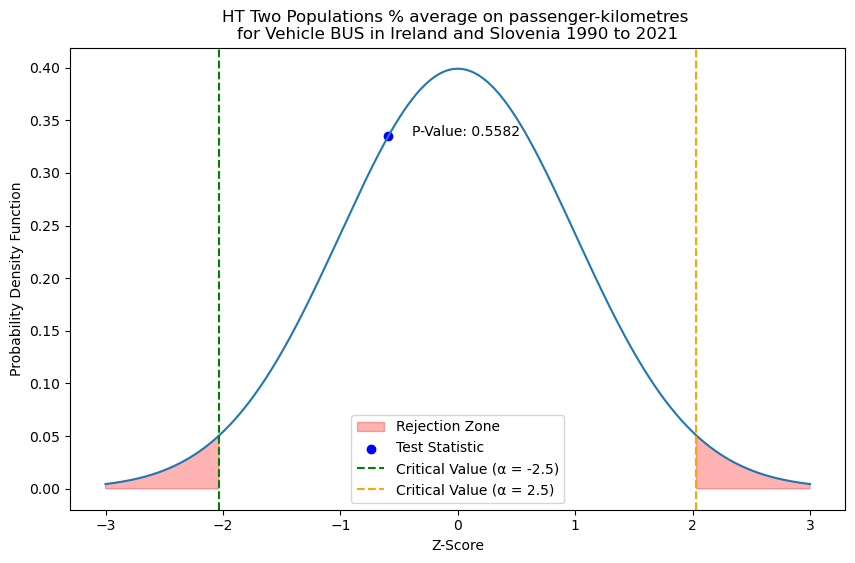

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Using data calculated above
statistic = -0.5914280128545741
p_value = 0.5581828652256509
alpha = 0.05
degrees_of_freedom = 33.67864035197684

plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility

# Define critical values
critical_value_positive = t.ppf(1 - alpha/2, df=degrees_of_freedom)
critical_value_negative = -critical_value_positive

# Generating x values to plot the curve
x = np.linspace(-3, 3, 1000)

# Calculating the normal distribution curve
y = norm.pdf(x, 0, 1)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
plt.fill_between(x, 0, y, where=[(val < critical_value_negative or val > critical_value_positive) for val in x], color='red', alpha=0.3, label='Rejection Zone')

# Marking the test statistic over the bell
plt.scatter([statistic], [norm.pdf(statistic)], color='blue', label='Test Statistic')

# Marking alpha values
plt.axvline(critical_value_negative, color='green', linestyle='--', label='Critical Value (α = -2.5)')
plt.axvline(critical_value_positive, color='orange', linestyle='--', label='Critical Value (α = 2.5)')

# Adding p-value number
plt.text(statistic + 0.2, norm.pdf(statistic), f'P-Value: {p_value:.4f}', color='black')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.title('HT Two Populations % average on passenger-kilometres \nfor Vehicle BUS in Ireland and Slovenia 1990 to 2021')

# Legend
plt.legend()

# Plotting
plt.show()


# HT Test Ireland & Denmark CAR % average on passenger-kilometres.

In [60]:
sdf1_car

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6
8,CH_CAR,32.0,NaN,NaN,NaN,78.528125,2.883796,73.9,75.0,79.55,81.025,82.5
11,DE_CAR,32.0,NaN,NaN,NaN,85.346875,1.169501,83.3,84.5,85.4,85.8,88.8
14,DK_CAR,32.0,NaN,NaN,NaN,79.909375,2.914409,75.2,77.65,79.95,81.925,87.3
17,EL_CAR,32.0,NaN,NaN,NaN,76.228125,7.092351,64.0,69.725,78.75,81.6,87.1
20,ES_CAR,32.0,NaN,NaN,NaN,81.39375,3.953189,68.5,80.8,81.65,82.55,89.5
23,FI_CAR,32.0,NaN,NaN,NaN,83.878125,1.59105,81.2,82.375,84.2,84.9,87.7
26,FR_CAR,32.0,NaN,NaN,NaN,85.378125,1.13101,83.3,84.575,85.5,86.4,87.0
29,HU_CAR,32.0,NaN,NaN,NaN,66.6125,4.557854,60.5,63.65,65.1,68.725,79.3


We want to analyse the percentage average on passenger-kilometres for Vehicle CAR.<br>
As we have to use Ireland as our baseline, we will have Ireland (IE) and the other choice would be Denmark (DK),<br>
I'm taking Denmark as it is a Nordic country and I'm thinking that maybe in average Danish people will have the same<br>
preferences as the Irish people in terms of using cars. Let's see if at 5% significance level,<br>
the null hypothesis (H0) will be rejected or accepted.<br><br>
Hypothesis:<br>
H0: mu IE_CAR = mu DK_CAR; There is no significant difference between the percentage average on passenger-kilometres for Vehicle CAR in Ireland and Denmark.<br>
H1: mu IE_CAR != mu DK_CAR; There is a significant difference between the percentage average on passenger-kilometres for Vehicle CAR in Ireland and Denmark.

In [61]:
# We need to define our variables

X1 = sdf1['IE_CAR']
X2 = sdf1['DK_CAR']

In [62]:
from scipy import stats

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

TtestResult(statistic=5.22119305877525, pvalue=4.987954681712246e-06, df=42.650292236590985)

As p_value < alpha, then we reject H0. Since the p-value is lower than the significance level 5%,we have enough evidence to reject the null hypothesis. There is enough evidence to state that there is a significant difference between the percentage average on passenger-kilometres for Vehicle CAR in Ireland and Denmark.<br>
Let's plot the results to better understand it.

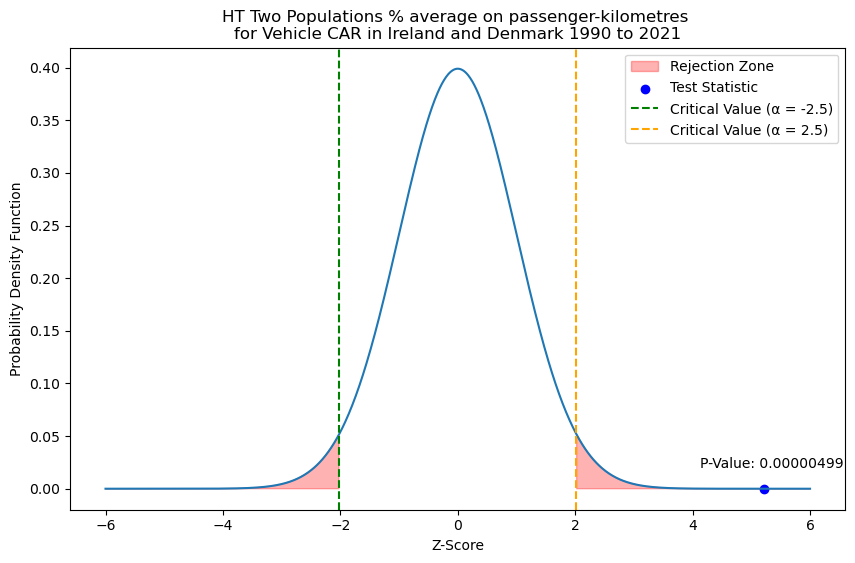

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Using data calculated above
statistic = 5.22119305877525
p_value = 4.987954681712246e-06
alpha = 0.05
degrees_of_freedom = 42.650292236590985

plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility

# Define critical values
critical_value_positive = t.ppf(1 - alpha/2, df=degrees_of_freedom)
critical_value_negative = -critical_value_positive

# Generating x values to plot the curve
x = np.linspace(-6, 6, 1000)

# Calculating the normal distribution curve
y = norm.pdf(x, 0, 1)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
plt.fill_between(x, 0, y, where=[(val < critical_value_negative or val > critical_value_positive) for val in x], color='red', alpha=0.3, label='Rejection Zone')

# Marking the test statistic over the bell
plt.scatter([statistic], [norm.pdf(statistic)], color='blue', label='Test Statistic')

# Marking alpha values
plt.axvline(critical_value_negative, color='green', linestyle='--', label='Critical Value (α = -2.5)')
plt.axvline(critical_value_positive, color='orange', linestyle='--', label='Critical Value (α = 2.5)')

# Adding p-value number
plt.text(statistic -1.1, norm.pdf(statistic)+0.02, f'P-Value: {p_value:.8f}', color='black')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.title('HT Two Populations % average on passenger-kilometres \nfor Vehicle CAR in Ireland and Denmark 1990 to 2021')

# Legend
plt.legend()

# Plotting
plt.show()


# HT Test Ireland & Switzerland TRN % average on passenger-kilometres.

In [64]:
sdf1_trn

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
6,BE_TRN,32.0,NaN,NaN,NaN,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2
9,CH_TRN,32.0,NaN,NaN,NaN,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0
12,DE_TRN,32.0,NaN,NaN,NaN,7.659375,0.808766,5.4,7.275,7.6,8.225,9.3
15,DK_TRN,32.0,NaN,NaN,NaN,8.365625,1.257906,5.8,7.95,8.4,9.3,10.3
18,EL_TRN,32.0,NaN,NaN,NaN,1.696875,0.873807,0.6,0.975,1.6,2.2,3.6
21,ES_TRN,32.0,NaN,NaN,NaN,5.84375,0.998366,4.1,5.175,5.45,6.625,8.5
24,FI_TRN,32.0,NaN,NaN,NaN,5.084375,0.437079,3.8,4.95,5.15,5.3,6.2
27,FR_TRN,32.0,NaN,NaN,NaN,9.028125,0.821578,7.5,8.35,9.1,9.8,10.3
30,HU_TRN,32.0,NaN,NaN,NaN,11.171875,2.125609,6.0,10.0,11.85,12.9,14.7


We want to analyse the percentage average on passenger-kilometres for Vehicle TRN.<br>
As we have to use Ireland as our baseline, we will have Ireland (IE) and the other choice would be Slovenia (SI),<br>
Slovenia is the closest in average to Ireland, for the rest of the countries H0 most likely will be rejected.<br>
Maybe for Slovenia we will accept H0.<br>
using 5% significance level.<br><br>
Hypothesis:<br>
H0: mu IE_TRN = mu SI_TRN; There is no significant difference between the percentage average on passenger-kilometres for Vehicle TRN in Ireland and Slovenia.<br>
H1: mu IE_TRN != mu SI_TRN; There is a significant difference between the percentage average on passenger-kilometres for Vehicle TRN in Ireland and Slovenia.

In [65]:
# We need to define our variables

X1 = sdf1['IE_TRN']
X2 = sdf1['SI_TRN']

In [66]:
from scipy import stats

t_test = stats.ttest_ind(X1, X2, equal_var = False)
display(t_test)

TtestResult(statistic=2.436805492627794, pvalue=0.018523237319062826, df=48.65558323773318)

As p_value < alpha, then we reject H0. Since the p-value is lower than the significance level 5%,we have enough evidence to reject the null hypothesis. There is enough evidence to state that there is a significant difference between the percentage average on passenger-kilometres for Vehicle TRN in Ireland and Slovenia.<br>
Let's plot the results to better understand it.

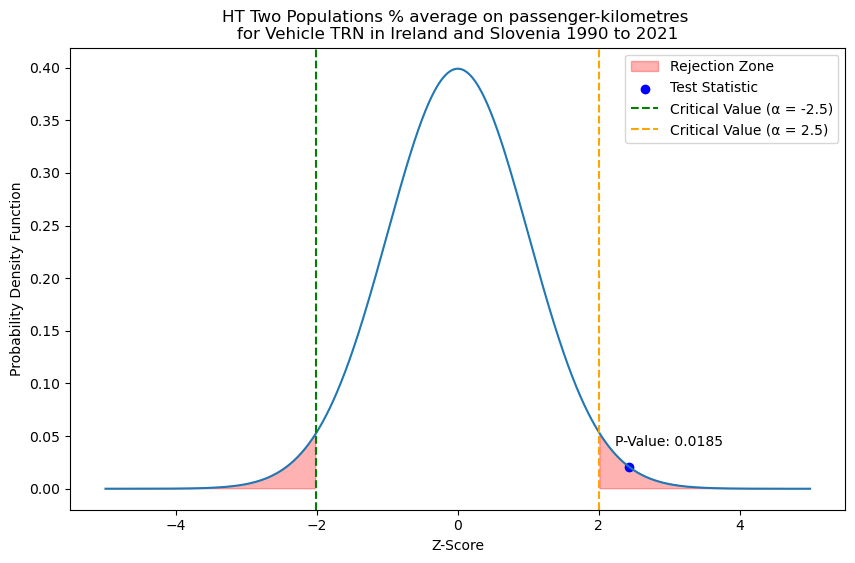

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Using data calculated above
statistic = 2.436805492627794
p_value = 0.018523237319062826
alpha = 0.05
degrees_of_freedom = 48.65558323773318

plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility

# Define critical values
critical_value_positive = t.ppf(1 - alpha/2, df=degrees_of_freedom)
critical_value_negative = -critical_value_positive

# Generating x values to plot the curve
x = np.linspace(-5, 5, 1000)

# Calculating the normal distribution curve
y = norm.pdf(x, 0, 1)

# Plotting the curve
plt.plot(x, y, label='')

# Creating the rejection zone
plt.fill_between(x, 0, y, where=[(val < critical_value_negative or val > critical_value_positive) for val in x], color='red', alpha=0.3, label='Rejection Zone')

# Marking the test statistic over the bell
plt.scatter([statistic], [norm.pdf(statistic)], color='blue', label='Test Statistic')

# Marking alpha values
plt.axvline(critical_value_negative, color='green', linestyle='--', label='Critical Value (α = -2.5)')
plt.axvline(critical_value_positive, color='orange', linestyle='--', label='Critical Value (α = 2.5)')

# Adding p-value number
plt.text(statistic -0.2, norm.pdf(statistic)+0.02, f'P-Value: {p_value:.4f}', color='black')

# Add labels and title
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.title('HT Two Populations % average on passenger-kilometres \nfor Vehicle TRN in Ireland and Slovenia 1990 to 2021')

# Legend
plt.legend()

# Plotting
plt.show()


# 3.3.1.2.	Anova

In [68]:
sdf2 = eurostat.get_data_df('ROAD_EQR_CARPDA',True)                                                                 
sdf2.head()



,freq,unit,mot_nrg,geo\TIME_PERIOD,2013_value,2013_flag,2014_value,2014_flag,2015_value,2015_flag,...,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag,2022_value,2022_flag
0,A,NR,ALT,AL,NaN,:,NaN,:,NaN,:,...,NaN,:,3757.0,,4935.0,,5703.0,,4114.0,
1,A,NR,ALT,AT,1285.0,,2074.0,,2389.0,,...,7406.0,,9841.0,,16393.0,,33466.0,,34242.0,
2,A,NR,ALT,BA,39.0,,46.0,,49.0,,...,41.0,,137.0,,73.0,,229.0,,300.0,
3,A,NR,ALT,BE,841.0,,2234.0,,2147.0,,...,7931.0,,12525.0,,18920.0,,25867.0,,40656.0,
4,A,NR,ALT,BG,NaN,:,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,23.0,,NaN,:


In [69]:
sdf2.to_csv('New_passenger_cars_by_type_of_motor_energy.csv', index=False)


# 3.3.1.3.	Chi-squared test	
# 3.3.2.	Non-parametric
# 3.3.2.1.	Kruskal-Wallis
# 3.3.2.2.	U-Mann Whitman